In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')
print('Libraries Import Succesfull')

Libraries Import Succesfull


In [2]:
online_store_data=pd.read_csv('OnlineRetail.csv',encoding='unicode_escape')
online_store_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
def df_summary(df):
    df_U=df.nunique()
    df_M=df.isnull().sum()
    df_I=df.dtypes
    df_U=df_U.to_frame().reset_index()
    df_M=df_M.to_frame().reset_index()
    df_I=df_I.to_frame().reset_index()
    df_U = df_U.rename(columns= {0: 'Unique Data'})   #renaming the 0 column tp Unique data
    df_M = df_M.rename(columns= {0: 'Missing Data'})
    df_I = df_I.rename(columns= {0: 'Data Types'})
    #merge on index all the 3 dataframe, merge two first then third
    output = pd.merge(pd.merge(df_M,df_U,on='index'),df_I,on='index')
    return output

In [4]:
print(online_store_data.shape)
print(online_store_data.info())


(541909, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [5]:
online_store_data['InvoiceDate']=pd.to_datetime(online_store_data['InvoiceDate'])
print(online_store_data.shape)
print(online_store_data.info())
print(online_store_data.describe())
df_summary(online_store_data)


(541909, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000 

,index,Missing Data,Unique Data,Data Types
0,InvoiceNo,0,25900,object
1,StockCode,0,4070,object
2,Description,1454,4223,object
3,Quantity,0,722,int64
4,InvoiceDate,0,23260,datetime64[ns]
5,UnitPrice,0,1630,float64
6,CustomerID,135080,4372,float64
7,Country,0,38,object


In [6]:
online_store_data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [7]:
# Droping Duplicates

In [8]:
duplicate=online_store_data[online_store_data.duplicated()]
duplicate.shape

(5268, 8)

In [9]:
new_data=online_store_data[['Country','CustomerID']].drop_duplicates()
new_data.shape

(4389, 2)

<AxesSubplot:>

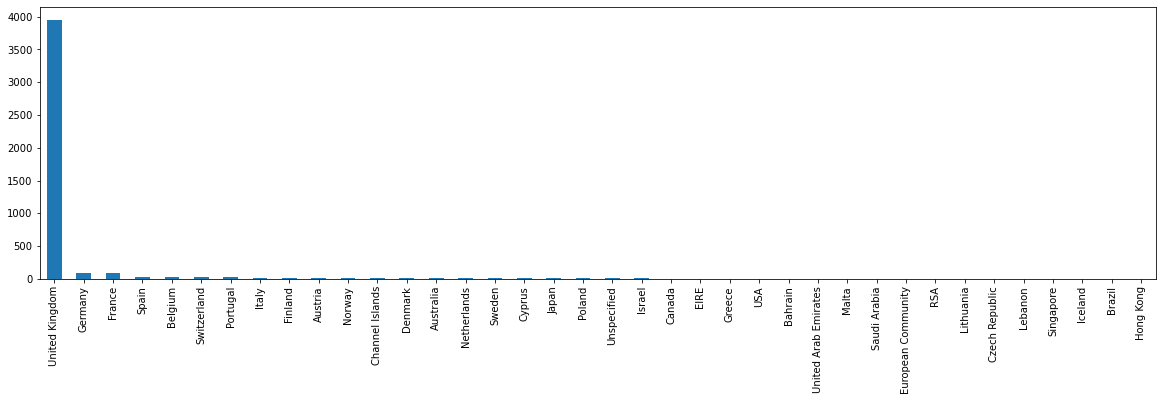

In [10]:
from matplotlib.pyplot import figure
figure(figsize=(20,5))
new_data.Country.value_counts().plot(kind='bar')


In [11]:
# Majority of the customers are from UK

In [12]:
# Cheacking missing values

In [13]:
online_store_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [14]:
print('customerid ={0:.2f}'.format(online_store_data['CustomerID'].isnull().sum()/len(online_store_data)*100)) 
print('Description ={0:.2f}'.format(online_store_data['Description'].isnull().sum()/len(online_store_data)*100)) 


customerid =24.93
Description =0.27


In [15]:
online_store_data.shape

(541909, 8)

In [16]:
online_store_data.dropna(inplace=True)

In [17]:
online_store_data.shape

(406829, 8)

In [18]:
# Cheacking negative values in Qty and unitprice
print(online_store_data[online_store_data.Quantity<0].count())
print(online_store_data[online_store_data.UnitPrice<0].count())

InvoiceNo      8905
StockCode      8905
Description    8905
Quantity       8905
InvoiceDate    8905
UnitPrice      8905
CustomerID     8905
Country        8905
dtype: int64
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [19]:
#in Quantiy 8905 values are negative and no value is negetive in unit price
# So we need to filter out records with negative values
online_store_data=online_store_data[online_store_data.Quantity>0]
online_store_data.shape

(397924, 8)

In [20]:
online_store_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [21]:
online_store_data['TotalAmt']=online_store_data.Quantity*online_store_data.UnitPrice
online_store_data.shape

(397924, 9)

In [22]:
online_store_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   TotalAmt     397924 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


In [23]:
# RFM MODELING

In [24]:
data=pd.DataFrame()
#data=online_store_data['Custom]
max(online_store_data.InvoiceDate)
data.shape

(0, 0)

In [25]:
import datetime as dt
latest_date=dt.datetime(2011,12,10)
maxdt=online_store_data.groupby('CustomerID')['InvoiceDate'].max()
recency=(latest_date-maxdt).dt.days



In [26]:
import datetime as dt
latest_date=dt.datetime(2011,12,10)
rfmscore=online_store_data.groupby('CustomerID').agg({'InvoiceDate':lambda x:(latest_date-x.max()).days,
                                                      'InvoiceNo':lambda x: len(x),'TotalAmt':lambda x: sum(x)})
rfmscore.rename(columns={'InvoiceDate':"Recency",'InvoiceNo':'Frequency','TotalAmt':"Monetary"},inplace=True)
rfmscore.reset_index(inplace=True)
rfmscore

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40
...,...,...,...,...
4334,18280.0,277,10,180.60
4335,18281.0,180,7,80.82
4336,18282.0,7,12,178.05
4337,18283.0,3,756,2094.88


In [27]:
rfmscore.describe()

,CustomerID,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,92.041484,91.708689,2053.793018
std,1721.889758,100.007757,228.792852,8988.248381
min,12346.000000,0.000000,1.000000,0.000000
25%,13812.500000,17.000000,17.000000,307.245000
50%,15299.000000,50.000000,41.000000,674.450000
75%,16778.500000,141.500000,100.000000,1661.640000
max,18287.000000,373.000000,7847.000000,280206.020000


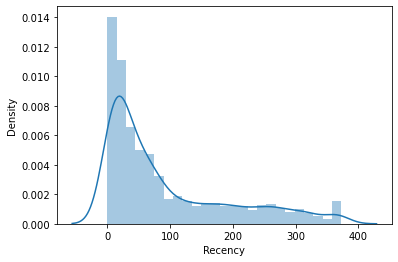

In [28]:
sns.distplot(rfmscore.Recency)

plt.show()

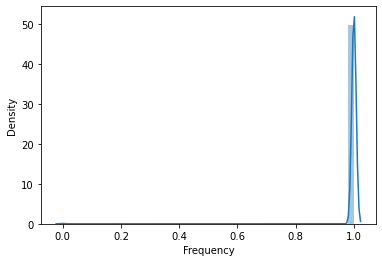

In [29]:
x=(rfmscore.Frequency<2000)
sns.distplot(x)
plt.show()

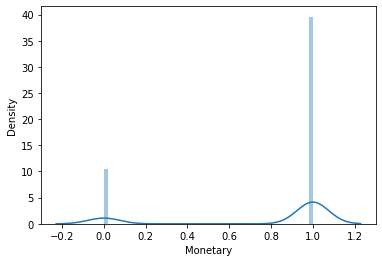

In [30]:
sns.distplot(rfmscore.Monetary<2000)
plt.show()

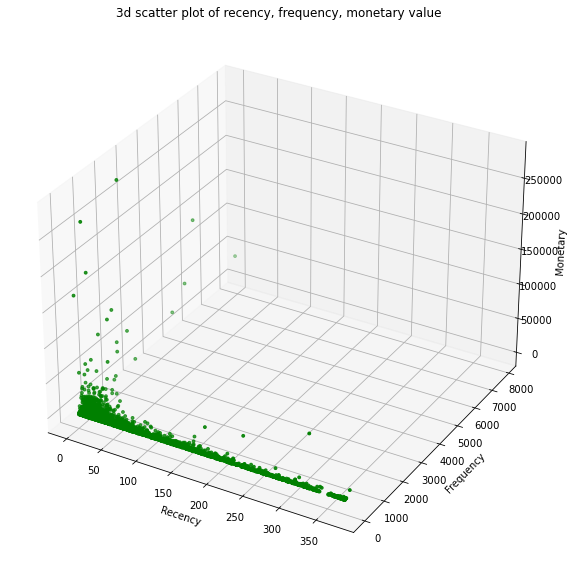

In [31]:
#3d scatter plot of recency, frequency, monetary value
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

xs =rfmscore.Recency
ys =rfmscore.Frequency
zs = rfmscore.Monetary
ax.scatter(xs, ys, zs, s=8,c='green')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('3d scatter plot of recency, frequency, monetary value')
plt.show()

In [32]:
quantiles=rfmscore.quantile(q=[0.25,0.50,0.75])
quantiles=quantiles.to_dict()
print(quantiles)


{'CustomerID': {0.25: 13812.5, 0.5: 15299.0, 0.75: 16778.5}, 'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5}, 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0}, 'Monetary': {0.25: 307.24499999999995, 0.5: 674.4499999999998, 0.75: 1661.6400000000003}}


In [33]:
rfmscore.head(100)
   
        

    


,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40
...,...,...,...,...
95,12462.0,18,62,1189.59
96,12463.0,53,83,1344.78
97,12464.0,10,29,1212.05
98,12465.0,17,47,742.19


In [34]:
def Rscore(x,p,d):
    if x<=d[p][0.25]:
        return 1
    elif x<=d[p][0.50]:
        return 2
    elif x<=d[p][0.25]:
        return 3
    else:
        return 4
def FMscore(x,p,d):
    if x<=d[p][0.25]:
        return 4
    elif x<=d[p][0.50]:
        return 3
    elif x<=d[p][0.25]:
        return 2
    else:
        return 1

In [35]:
rfmscore['R']=rfmscore['Recency'].apply(Rscore,args=('Recency',quantiles,))
rfmscore['F']=rfmscore['Frequency'].apply(FMscore,args=('Frequency',quantiles,))
rfmscore['M']=rfmscore['Monetary'].apply(FMscore,args=('Monetary',quantiles,))

In [36]:
rfmscore

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,325,1,77183.60,4,4,1
1,12347.0,2,182,4310.00,1,1,1
2,12348.0,75,31,1797.24,4,3,1
3,12349.0,18,73,1757.55,2,1,1
4,12350.0,310,17,334.40,4,4,3
...,...,...,...,...,...,...,...
4334,18280.0,277,10,180.60,4,4,4
4335,18281.0,180,7,80.82,4,4,4
4336,18282.0,7,12,178.05,1,4,4
4337,18283.0,3,756,2094.88,1,1,1


In [37]:
rfmscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4339 non-null   float64
 1   Recency     4339 non-null   int64  
 2   Frequency   4339 non-null   int64  
 3   Monetary    4339 non-null   float64
 4   R           4339 non-null   int64  
 5   F           4339 non-null   int64  
 6   M           4339 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 237.4 KB


In [38]:
rfmscore['RFMscore']=rfmscore['R']+rfmscore['F']+rfmscore['M']

In [39]:
rfmscore

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMscore
0,12346.0,325,1,77183.60,4,4,1,9
1,12347.0,2,182,4310.00,1,1,1,3
2,12348.0,75,31,1797.24,4,3,1,8
3,12349.0,18,73,1757.55,2,1,1,4
4,12350.0,310,17,334.40,4,4,3,11
...,...,...,...,...,...,...,...,...
4334,18280.0,277,10,180.60,4,4,4,12
4335,18281.0,180,7,80.82,4,4,4,12
4336,18282.0,7,12,178.05,1,4,4,9
4337,18283.0,3,756,2094.88,1,1,1,3


In [40]:
rfmscore['RFMgroup']=rfmscore.R.map(str)+rfmscore.F.map(str)+rfmscore.M.map(str)

In [41]:
rfmscore


,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMscore,RFMgroup
0,12346.0,325,1,77183.60,4,4,1,9,441
1,12347.0,2,182,4310.00,1,1,1,3,111
2,12348.0,75,31,1797.24,4,3,1,8,431
3,12349.0,18,73,1757.55,2,1,1,4,211
4,12350.0,310,17,334.40,4,4,3,11,443
...,...,...,...,...,...,...,...,...,...
4334,18280.0,277,10,180.60,4,4,4,12,444
4335,18281.0,180,7,80.82,4,4,4,12,444
4336,18282.0,7,12,178.05,1,4,4,9,144
4337,18283.0,3,756,2094.88,1,1,1,3,111


In [42]:
rfmscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4339 non-null   float64
 1   Recency     4339 non-null   int64  
 2   Frequency   4339 non-null   int64  
 3   Monetary    4339 non-null   float64
 4   R           4339 non-null   int64  
 5   F           4339 non-null   int64  
 6   M           4339 non-null   int64  
 7   RFMscore    4339 non-null   int64  
 8   RFMgroup    4339 non-null   object 
dtypes: float64(2), int64(6), object(1)
memory usage: 305.2+ KB


In [43]:
#taking the range for centroids from 1 to 10
from sklearn.cluster import KMeans
wcss =[]
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(rfmscore)
    wcss.append(kmeans.inertia_)

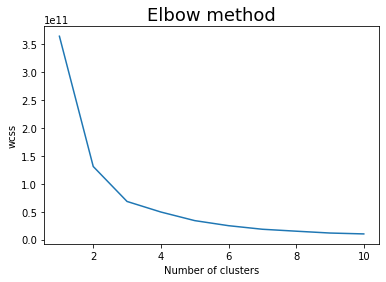

In [44]:
#plt.figure(figsize)
plt.plot(range(1,11),wcss)
plt.title('Elbow method',fontsize=18)
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

In [45]:
# Optimum clusters 3 is fine for dataset

In [53]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,init='k-means++',max_iter=1000,random_state=41)
y_means=km.fit_predict(rfmscore)
km.labels_


array([2, 0, 0, ..., 0, 0, 0])

In [54]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(rfmscore,y_means)
silhouette_avg

0.9379621145657494

In [55]:
rfmscore['Cluster']=km.labels_
rfmscore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMscore,RFMgroup,Cluster
0,12346.0,325,1,77183.60,4,4,1,9,441,2
1,12347.0,2,182,4310.00,1,1,1,3,111,0
2,12348.0,75,31,1797.24,4,3,1,8,431,0
3,12349.0,18,73,1757.55,2,1,1,4,211,0
4,12350.0,310,17,334.40,4,4,3,11,443,0


<Figure size 504x504 with 0 Axes>

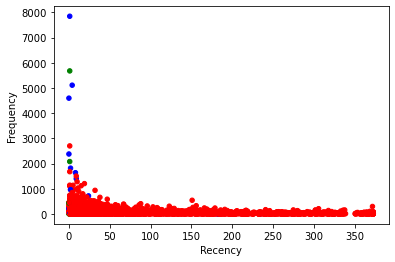

In [56]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))
colors=['red','green','blue']
rfmscore['color']=rfmscore['Cluster'].map(lambda p:colors[p])
ax=rfmscore.plot(
kind="scatter",
x="Recency",y="Frequency",c=rfmscore['color'])

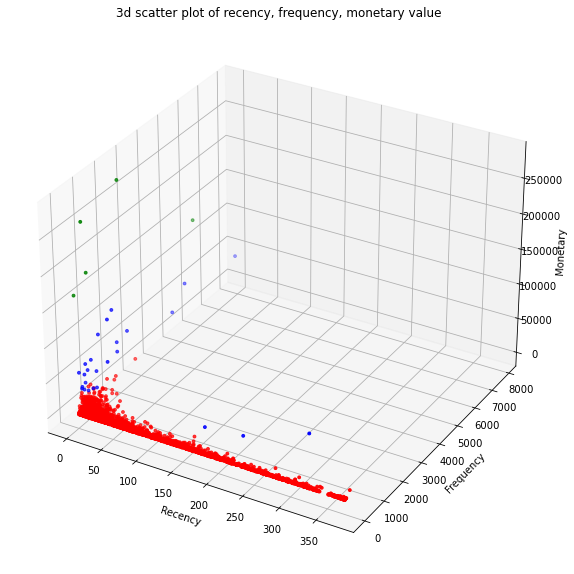

In [57]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

xs =rfmscore.Recency
ys =rfmscore.Frequency
zs = rfmscore.Monetary
ax.scatter(xs, ys, zs, s=8,c=rfmscore['color'])

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('3d scatter plot of recency, frequency, monetary value')
plt.show()

In [58]:
rfmscore.Cluster.unique

<bound method Series.unique of 0       2
1       0
2       0
3       0
4       0
       ..
4334    0
4335    0
4336    0
4337    0
4338    0
Name: Cluster, Length: 4339, dtype: int32>